In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

from PIL import Image
from io import BytesIO
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
IMAGE_EMBEDDING_PATH_2 = '1117img_layer2_feature.csv'
IMAGE_EMBEDDING_PATH_2_3 = '1117img_layer2+3_feature.csv'
IMAGE_EMBEDDING_PATH_2_3_4 = '1117img_layer2+3+4_feature.csv'
IMAGE_EMBEDDING_PATH_2_4 = '1117img_layer2+4_feature.csv'
IMAGE_EMBEDDING_PATH_3 = '1117img_layer3_feature.csv'
IMAGE_EMBEDDING_PATH_3_4 = '1117img_layer3_4_feature.csv'
IMAGE_EMBEDDING_PATH_4 = '1117img_layer4_feature.csv'

In [ ]:
# 전체 전처리 데이터 (숙소 유형 줄인 데이터)
df_data_preprocessed = pd.read_csv('/content/drive/MyDrive/추천시스템_컨퍼런스/숙소유형 인코딩2.csv')
df_data_preprocessed

,이미지 인덱스,이미지주소,숙소이름,한줄소개,리뷰평점 및 개수,숙소 링크,keyword,평점,후기개수,keyword2,개인실,다인실,별채,아파트,캠핑,펜션 * 빌라,호텔 * 리조트
0,jeju_1,https://a0.muscache.com/im/pictures/85dfb906-4...,"애월읍, 제주시의 전원주택",7번방의선물,"평점 5.0점(5점 만점), 후기 8개",https://www.airbnb.co.kr/rooms/654748909105050...,전원주택,5.0,8,펜션 * 빌라,0,0,0,0,0,1,0
1,jeju_2,https://a0.muscache.com/im/pictures/miso/Hosti...,"애월읍, 제주시의 전원주택","<애월, 단독> 2층-오션뷰 ♡잔디밭 100평. 야외스파. 화장실3. 복층 전원주택","평점 5.0점(5점 만점), 후기 5개",https://www.airbnb.co.kr/rooms/609619956836759...,전원주택,5.0,5,펜션 * 빌라,0,0,0,0,0,1,0
2,jeju_3,https://a0.muscache.com/im/pictures/60e684d8-b...,"Hallim-eub, Cheju의 게스트용 별채",'어떤제주'를 상상하며 여행 오시나요? 잊지 못할 추억을 '어떤제주'에서 만들어 보세요.,"평점 4.9점(5점 만점), 후기 39개",https://www.airbnb.co.kr/rooms/23033879?adults...,별채,4.9,39,별채,0,0,1,0,0,0,0
3,jeju_4,https://a0.muscache.com/im/pictures/miso/Hosti...,"애월읍, 제주시의 캠핑카","비치보이스, Boy25","평점 4.75점(5점 만점), 후기 110개",https://www.airbnb.co.kr/rooms/45731996?adults...,캠핑카,4.75,110,캠핑,0,0,0,0,1,0,0
4,jeju_5,https://a0.muscache.com/im/pictures/miso/Hosti...,"Hangyeong-myeon, Cheju의 개인실","mukda_101/제주서쪽 ""판포"" _바다 앞 오션뷰_ 하와 카페&펍에서 음료&칵테...","평점 4.95점(5점 만점), 후기 60개",https://www.airbnb.co.kr/rooms/52844863?adults...,개인실,4.95,60,개인실,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,gyeongbuk_294,https://a0.muscache.com/im/pictures/0f9e01c7-b...,영덕군의 돔하우스,동해바다가 내려다 보이는 감성충만한 돔하우스 산장,"평점 4.24점(5점 만점), 후기 58개",https://www.airbnb.co.kr/rooms/15271664?adults...,돔하우스,4.24,58,캠핑,0,0,0,0,1,0,0
1113,gyeongbuk_295,https://a0.muscache.com/im/pictures/ba9b911e-c...,"Jung-dong, Suseong-gu의 집",☆☆신규오픈특가 ♡비밀의 정원 (모던한 스타일의 조용하고 아늑한 둘만의 공간~),"평점 4.49점(5점 만점), 후기 45개",https://www.airbnb.co.kr/rooms/52126866?adults...,집,4.49,45,펜션 * 빌라,0,0,0,0,0,1,0
1114,gyeongbuk_297,https://a0.muscache.com/im/pictures/918a2203-0...,"Maepo-eup, Danyang-gun의 아파트",시가 생각나는 조용하고 멋진뷰를 가진 숙소,"평점 4.95점(5점 만점), 후기 133개",https://www.airbnb.co.kr/rooms/49005530?adults...,아파트,4.95,133,아파트,0,0,0,1,0,0,0
1115,gyeongbuk_298,https://a0.muscache.com/im/pictures/2c79d403-0...,의성군의 펜션,"의성서당 (한옥도서관, 북스테이)","평점 4.91점(5점 만점), 후기 56개",https://www.airbnb.co.kr/rooms/42728755?adults...,펜션,4.91,56,펜션 * 빌라,0,0,0,0,0,1,0


In [ ]:
df_data_preprocessed.rename(
    columns={
        '이미지 인덱스' : 'image_index',
        '이미지주소': 'image_url',
        '평점': 'rating',
        '후기개수': 'comment',
        '개인실': 'single',
        '다인실': 'multi',
        '별채': 'outhouse',
        '아파트': 'apartment',
        '캠핑': 'camping',
        '펜션 * 빌라': 'pension',
        '호텔 * 리조트': 'hotel',
    },
    inplace=True)
#df_data_preprocessed.index = df_data_preprocessed.index.rename('image_index')
df_data_preprocessed

,image_index,image_url,숙소이름,한줄소개,리뷰평점 및 개수,숙소 링크,keyword,rating,comment,keyword2,single,multi,outhouse,apartment,camping,pension,hotel
0,jeju_1,https://a0.muscache.com/im/pictures/85dfb906-4...,"애월읍, 제주시의 전원주택",7번방의선물,"평점 5.0점(5점 만점), 후기 8개",https://www.airbnb.co.kr/rooms/654748909105050...,전원주택,5.0,8,펜션 * 빌라,0,0,0,0,0,1,0
1,jeju_2,https://a0.muscache.com/im/pictures/miso/Hosti...,"애월읍, 제주시의 전원주택","<애월, 단독> 2층-오션뷰 ♡잔디밭 100평. 야외스파. 화장실3. 복층 전원주택","평점 5.0점(5점 만점), 후기 5개",https://www.airbnb.co.kr/rooms/609619956836759...,전원주택,5.0,5,펜션 * 빌라,0,0,0,0,0,1,0
2,jeju_3,https://a0.muscache.com/im/pictures/60e684d8-b...,"Hallim-eub, Cheju의 게스트용 별채",'어떤제주'를 상상하며 여행 오시나요? 잊지 못할 추억을 '어떤제주'에서 만들어 보세요.,"평점 4.9점(5점 만점), 후기 39개",https://www.airbnb.co.kr/rooms/23033879?adults...,별채,4.9,39,별채,0,0,1,0,0,0,0
3,jeju_4,https://a0.muscache.com/im/pictures/miso/Hosti...,"애월읍, 제주시의 캠핑카","비치보이스, Boy25","평점 4.75점(5점 만점), 후기 110개",https://www.airbnb.co.kr/rooms/45731996?adults...,캠핑카,4.75,110,캠핑,0,0,0,0,1,0,0
4,jeju_5,https://a0.muscache.com/im/pictures/miso/Hosti...,"Hangyeong-myeon, Cheju의 개인실","mukda_101/제주서쪽 ""판포"" _바다 앞 오션뷰_ 하와 카페&펍에서 음료&칵테...","평점 4.95점(5점 만점), 후기 60개",https://www.airbnb.co.kr/rooms/52844863?adults...,개인실,4.95,60,개인실,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,gyeongbuk_294,https://a0.muscache.com/im/pictures/0f9e01c7-b...,영덕군의 돔하우스,동해바다가 내려다 보이는 감성충만한 돔하우스 산장,"평점 4.24점(5점 만점), 후기 58개",https://www.airbnb.co.kr/rooms/15271664?adults...,돔하우스,4.24,58,캠핑,0,0,0,0,1,0,0
1113,gyeongbuk_295,https://a0.muscache.com/im/pictures/ba9b911e-c...,"Jung-dong, Suseong-gu의 집",☆☆신규오픈특가 ♡비밀의 정원 (모던한 스타일의 조용하고 아늑한 둘만의 공간~),"평점 4.49점(5점 만점), 후기 45개",https://www.airbnb.co.kr/rooms/52126866?adults...,집,4.49,45,펜션 * 빌라,0,0,0,0,0,1,0
1114,gyeongbuk_297,https://a0.muscache.com/im/pictures/918a2203-0...,"Maepo-eup, Danyang-gun의 아파트",시가 생각나는 조용하고 멋진뷰를 가진 숙소,"평점 4.95점(5점 만점), 후기 133개",https://www.airbnb.co.kr/rooms/49005530?adults...,아파트,4.95,133,아파트,0,0,0,1,0,0,0
1115,gyeongbuk_298,https://a0.muscache.com/im/pictures/2c79d403-0...,의성군의 펜션,"의성서당 (한옥도서관, 북스테이)","평점 4.91점(5점 만점), 후기 56개",https://www.airbnb.co.kr/rooms/42728755?adults...,펜션,4.91,56,펜션 * 빌라,0,0,0,0,0,1,0


# layer 4

In [ ]:
# 이미지 임베딩 데이터 (layer 4이용)
path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer4_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding

,img_name,L4_0,L4_1,L4_2,L4_3,L4_4,L4_5,L4_6,L4_7,L4_8,...,L4_502,L4_503,L4_504,L4_505,L4_506,L4_507,L4_508,L4_509,L4_510,L4_511
0,gyeongnam_203.jpg,0.859666,0.991506,0.875786,1.105204,0.882326,0.932529,0.958247,1.049270,0.957716,...,0.868787,0.939986,0.930962,0.891540,1.075375,0.981445,0.939782,0.905530,1.049204,0.956306
1,gyeongbuk_194.jpg,0.887674,0.938588,0.984997,0.993302,0.952346,0.867004,0.949086,1.145820,0.954059,...,0.933420,0.918735,0.873764,0.814997,1.142438,0.961114,0.921529,0.869837,1.010402,0.949081
2,gyeongnam_217.jpg,0.865426,0.856954,0.942237,0.992056,0.896226,0.812261,0.973277,1.169686,0.909709,...,0.925228,0.860799,0.903770,0.865802,1.130654,1.060827,0.842281,0.886043,1.154529,0.931309
3,jeju_102.jpg,0.887677,0.977672,0.993547,1.024757,0.981420,0.837704,0.930538,1.237387,0.931367,...,0.877792,0.944481,0.853980,0.896813,1.073029,0.988909,0.937262,0.970793,0.991031,0.978287
4,jeju_116.jpg,0.874481,1.001812,0.995884,1.019042,0.922820,0.900534,0.923495,1.152253,0.869257,...,0.929320,0.909326,0.905449,0.905713,1.079198,1.035871,0.899902,0.988840,1.087273,0.901601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,gyeongnam_232.jpg,0.930864,0.958179,0.954716,1.009896,0.896230,0.919095,0.903566,1.164350,0.987083,...,0.938534,0.903383,0.984284,0.834925,1.097964,0.901745,0.938423,0.987846,1.090713,0.983477
1113,gyeongnam_226.jpg,0.941443,0.945894,0.934900,1.055538,0.997482,0.881454,0.944459,1.271220,0.901844,...,0.959296,0.940265,0.899484,0.815066,1.180603,1.067878,0.888551,0.943487,1.095905,0.946472
1114,jeju_133.jpg,0.898361,1.030736,1.010446,1.037791,0.970882,0.858237,0.912649,1.244254,1.026163,...,0.887611,0.955979,0.854755,0.821449,1.224061,0.978837,0.976867,0.932357,1.063367,0.945248
1115,jeju_127.jpg,0.870150,0.951886,0.970361,1.045178,0.915710,0.932503,0.902959,1.152438,0.989491,...,0.919948,0.945434,0.854771,0.854165,1.087450,1.016544,1.010237,0.848643,1.135118,0.956876


In [ ]:
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_image_embedding

,image_index,img_name,L4_0,L4_1,L4_2,L4_3,L4_4,L4_5,L4_6,L4_7,...,L4_502,L4_503,L4_504,L4_505,L4_506,L4_507,L4_508,L4_509,L4_510,L4_511
0,gyeongnam_203,gyeongnam_203.jpg,0.859666,0.991506,0.875786,1.105204,0.882326,0.932529,0.958247,1.049270,...,0.868787,0.939986,0.930962,0.891540,1.075375,0.981445,0.939782,0.905530,1.049204,0.956306
1,gyeongbuk_194,gyeongbuk_194.jpg,0.887674,0.938588,0.984997,0.993302,0.952346,0.867004,0.949086,1.145820,...,0.933420,0.918735,0.873764,0.814997,1.142438,0.961114,0.921529,0.869837,1.010402,0.949081
2,gyeongnam_217,gyeongnam_217.jpg,0.865426,0.856954,0.942237,0.992056,0.896226,0.812261,0.973277,1.169686,...,0.925228,0.860799,0.903770,0.865802,1.130654,1.060827,0.842281,0.886043,1.154529,0.931309
3,jeju_102,jeju_102.jpg,0.887677,0.977672,0.993547,1.024757,0.981420,0.837704,0.930538,1.237387,...,0.877792,0.944481,0.853980,0.896813,1.073029,0.988909,0.937262,0.970793,0.991031,0.978287
4,jeju_116,jeju_116.jpg,0.874481,1.001812,0.995884,1.019042,0.922820,0.900534,0.923495,1.152253,...,0.929320,0.909326,0.905449,0.905713,1.079198,1.035871,0.899902,0.988840,1.087273,0.901601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,gyeongnam_232,gyeongnam_232.jpg,0.930864,0.958179,0.954716,1.009896,0.896230,0.919095,0.903566,1.164350,...,0.938534,0.903383,0.984284,0.834925,1.097964,0.901745,0.938423,0.987846,1.090713,0.983477
1113,gyeongnam_226,gyeongnam_226.jpg,0.941443,0.945894,0.934900,1.055538,0.997482,0.881454,0.944459,1.271220,...,0.959296,0.940265,0.899484,0.815066,1.180603,1.067878,0.888551,0.943487,1.095905,0.946472
1114,jeju_133,jeju_133.jpg,0.898361,1.030736,1.010446,1.037791,0.970882,0.858237,0.912649,1.244254,...,0.887611,0.955979,0.854755,0.821449,1.224061,0.978837,0.976867,0.932357,1.063367,0.945248
1115,jeju_127,jeju_127.jpg,0.870150,0.951886,0.970361,1.045178,0.915710,0.932503,0.902959,1.152438,...,0.919948,0.945434,0.854771,0.854165,1.087450,1.016544,1.010237,0.848643,1.135118,0.956876


In [ ]:
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L4_0,L4_1,L4_2,L4_3,L4_4,L4_5,L4_6,L4_7,L4_8,L4_9,...,L4_509,L4_510,L4_511,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.859666,0.991506,0.875786,1.105204,0.882326,0.932529,0.958247,1.049270,0.957716,0.930442,...,0.905530,1.049204,0.956306,1,0,0,0,0,0,0
gyeongbuk_194,0.887674,0.938588,0.984997,0.993302,0.952346,0.867004,0.949086,1.145820,0.954059,0.939324,...,0.869837,1.010402,0.949081,1,0,0,0,0,0,0
gyeongnam_217,0.865426,0.856954,0.942237,0.992056,0.896226,0.812261,0.973277,1.169686,0.909709,0.894109,...,0.886043,1.154529,0.931309,0,0,0,0,0,1,0
jeju_102,0.887677,0.977672,0.993547,1.024757,0.981420,0.837704,0.930538,1.237387,0.931367,0.991123,...,0.970793,0.991031,0.978287,0,0,0,1,0,0,0
jeju_116,0.874481,1.001812,0.995884,1.019042,0.922820,0.900534,0.923495,1.152253,0.869257,0.926860,...,0.988840,1.087273,0.901601,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.930864,0.958179,0.954716,1.009896,0.896230,0.919095,0.903566,1.164350,0.987083,0.942037,...,0.987846,1.090713,0.983477,0,0,0,0,0,1,0
gyeongnam_226,0.941443,0.945894,0.934900,1.055538,0.997482,0.881454,0.944459,1.271220,0.901844,0.949341,...,0.943487,1.095905,0.946472,0,0,0,0,0,1,0
jeju_133,0.898361,1.030736,1.010446,1.037791,0.970882,0.858237,0.912649,1.244254,1.026163,0.938343,...,0.932357,1.063367,0.945248,0,0,0,0,0,1,0


## 코사인 유사도 바탕으로 군집화 : SphericalKMeans

In [ ]:
pip install soyClustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.85966617, 0.991506  , 0.8757859 , ..., 0.        , 0.        ,
        0.        ],
       [0.88767445, 0.9385882 , 0.98499656, ..., 0.        , 0.        ,
        0.        ],
       [0.8654256 , 0.8569539 , 0.9422369 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.8983614 , 1.0307361 , 1.0104457 , ..., 0.        , 1.        ,
        0.        ],
       [0.87014955, 0.9518863 , 0.9703611 , ..., 0.        , 1.        ,
        0.        ],
       [0.90483576, 1.0278258 , 0.98856807, ..., 0.        , 0.        ,
        0.        ]])

### 군집수 100개

In [ ]:
from soyclustering import SphericalKMeans
from scipy import sparse
spherical_kmeans = SphericalKMeans(
    n_clusters=100, # 군집수 100개
    max_iter=100,
    verbose=0,
    random_state = 42,
    init='similar_cut'
)
df_spheric_kmenas_result = df_for_similarity.copy()

csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
df_spheric_kmenas_result['cluster_spheric'] = spherical_kmeans.fit_predict(csr_for_kmean)
df_spheric_kmenas_result

,L4_0,L4_1,L4_2,L4_3,L4_4,L4_5,L4_6,L4_7,L4_8,L4_9,...,L4_510,L4_511,single,multi,outhouse,apartment,camping,pension,hotel,cluster_spheric
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.859666,0.991506,0.875786,1.105204,0.882326,0.932529,0.958247,1.049270,0.957716,0.930442,...,1.049204,0.956306,1,0,0,0,0,0,0,39
gyeongbuk_194,0.887674,0.938588,0.984997,0.993302,0.952346,0.867004,0.949086,1.145820,0.954059,0.939324,...,1.010402,0.949081,1,0,0,0,0,0,0,95
gyeongnam_217,0.865426,0.856954,0.942237,0.992056,0.896226,0.812261,0.973277,1.169686,0.909709,0.894109,...,1.154529,0.931309,0,0,0,0,0,1,0,69
jeju_102,0.887677,0.977672,0.993547,1.024757,0.981420,0.837704,0.930538,1.237387,0.931367,0.991123,...,0.991031,0.978287,0,0,0,1,0,0,0,16
jeju_116,0.874481,1.001812,0.995884,1.019042,0.922820,0.900534,0.923495,1.152253,0.869257,0.926860,...,1.087273,0.901601,0,0,1,0,0,0,0,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.930864,0.958179,0.954716,1.009896,0.896230,0.919095,0.903566,1.164350,0.987083,0.942037,...,1.090713,0.983477,0,0,0,0,0,1,0,53
gyeongnam_226,0.941443,0.945894,0.934900,1.055538,0.997482,0.881454,0.944459,1.271220,0.901844,0.949341,...,1.095905,0.946472,0,0,0,0,0,1,0,38
jeju_133,0.898361,1.030736,1.010446,1.037791,0.970882,0.858237,0.912649,1.244254,1.026163,0.938343,...,1.063367,0.945248,0,0,0,0,0,1,0,38


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 100
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric'] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['jeonnam_59']
1
-----------------------------------------------------------------------------
1번째 cluster
['gyeongnam_110', 'gyeongbuk_284', 'jeonnam_236']
3
-----------------------------------------------------------------------------
2번째 cluster
['gyeongbuk_182', 'gyeongnam_215', 'jeju_66', 'jeonnam_216', 'jeonnam_188', 'gyeongbuk_285', 'gyeongnam_73', 'gyeongbuk_49', 'gangwon_179', 'gyeongnam_169', 'jeonnam_124', 'gangwon_15']
12
-----------------------------------------------------------------------------
3번째 cluster
['gyeongnam_18']
1
-----------------------------------------------------------------------------
4번째 cluster
['jeonnam_101', 'gyeongbuk_186', 'gyeongbuk_35', 'gangwon_138', 'jeonnam_166', 'gyeongnam_70', 'gyeongnam_64', 'gyeongnam_242', 'jeonnam_143', 'jeonnam_181', 'jeonnam_234', 'jeju_156', 'jeju_150', 'jeonnam_137', 'gyeongnam_155', 'gyeongnam_237', 'gyeongbuk_148', 'jeju_121', 'jeju_109', 'gyeongnam_147', 'jeju_127']
21
--------------------------------

In [ ]:
# spherical_cluster 결과 확인
def get_spherical_cluster_image(cluster_index):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric'] == cluster_index].index)
    len_cluster_list = len(cluster_list)
    rows = int(len_cluster_list / 3) + (len_cluster_list % 3 > 0)
    cols = 3
    axes = []
    fig = plt.figure(figsize=(10, len_cluster_list))

    for num, index in enumerate(cluster_list):
        url = df_data_preprocessed[df_data_preprocessed['image_index'] == index]['image_url'].values[0]
        axes.append(fig.add_subplot(rows, cols, num + 1))
        subplot_title = "Subplot " + str(num)
        axes[-1].set_title(subplot_title)
        res = requests.get(url)
        request_image = Image.open(BytesIO(res.content))
        plt.imshow(request_image)
    fig.tight_layout()
    plt.show()

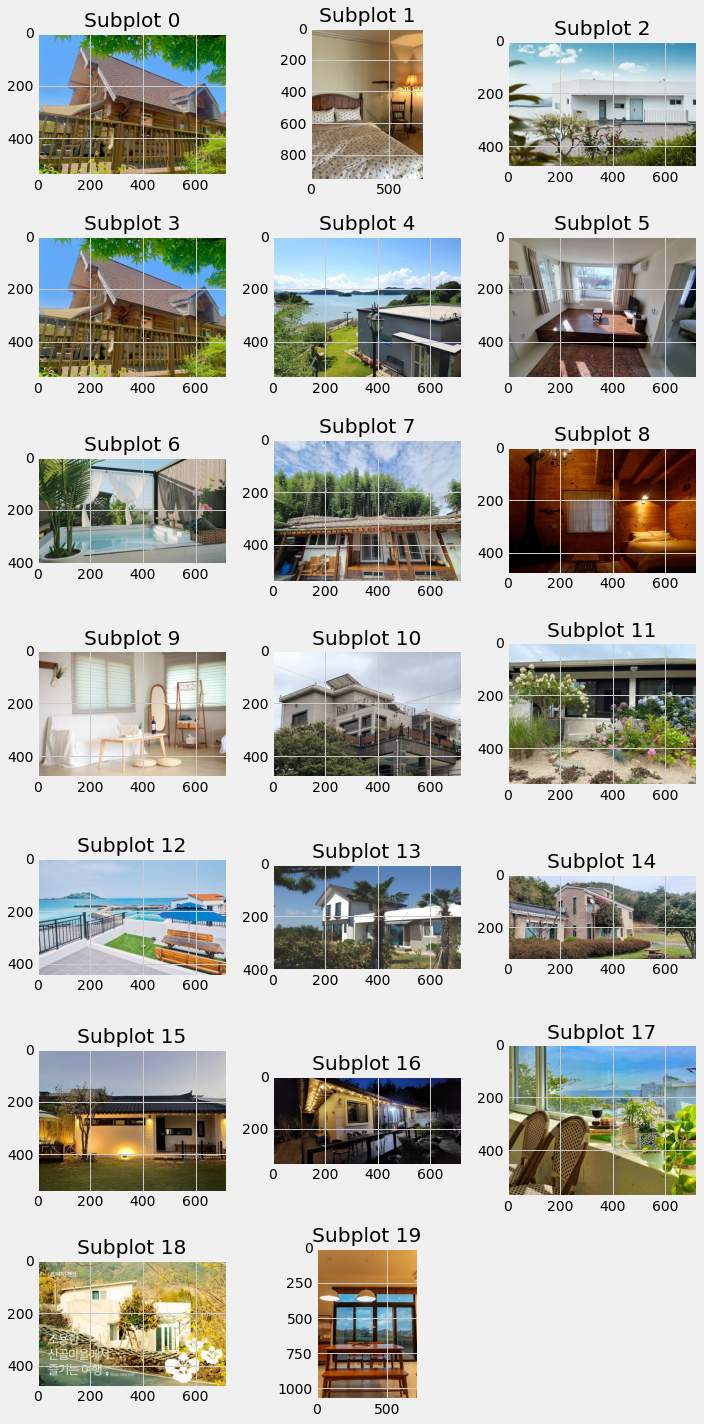

In [ ]:
spherical_cluster_index = 38
get_spherical_cluster_image(spherical_cluster_index)

### 군집수는 몇개 ? 실루엣 계수 분석
* 전체 실루엣 계수의 평균값은 0~1 사이의 값을 지님, 1에 가까울수록 좋음.


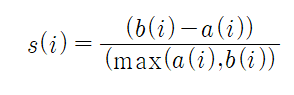

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [15, 20]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300, minimum_df_factor=0.1, random_state=0, sparsity='minimum_df', init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 15
0.2071809682946044
-------------------------------------------------------------
n_cluster : 20
0.24740815545892905
-------------------------------------------------------------


In [ ]:
# 각 군집별 이미지 개수 구하기
n_cluster = 20
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['gyeongbuk_284']
1
-----------------------------------------------------------------------------
1번째 cluster
['gyeongbuk_243']
1
-----------------------------------------------------------------------------
2번째 cluster
['gyeongbuk_293']
1
-----------------------------------------------------------------------------
3번째 cluster
['gyeongnam_217', 'gyeongbuk_143', 'gyeongbuk_221', 'gangwon_5', 'jeonnam_103', 'jeonnam_72', 'gyeongbuk_220', 'gyeongnam_174', 'gyeongbuk_1', 'gyeongbuk_195', 'gyeongbuk_33', 'jeonnam_100', 'gyeongnam_18', 'gyeongbuk_237', 'gyeongnam_24', 'gangwon_25', 'gyeongbuk_182', 'gyeongnam_201', 'gyeongbuk_151', 'jeonnam_266', 'gyeongnam_20', 'gyeongbuk_233', 'gangwon_3', 'gyeongbuk_226', 'jeju_113', 'gyeongbuk_191', 'jeju_2', 'gangwon_160', 'jeju_66', 'gangwon_0', 'jeonnam_113', 'jeju_98', 'gyeongnam_22', 'gangwon_23', 'gyeongbuk_153', 'gyeongnam_207', 'gyeongbuk_84', 'gyeongnam_116', 'gyeongnam_92', 'gangwon_106', 'jeonnam_10', 'jeonnam_175', 'jeonnam_160',

In [ ]:
# spherical_cluster 결과 확인
def get_spherical_cluster_image(n_cluster, cluster_index):
    print('n_cluster : ' + str(n_cluster) + 'cluster_index : ' + str(cluster_index))
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == cluster_index].sort_values(by = 'sil_coef_'+str(n_cluster), ascending = False).index)
    if len(cluster_list) >= 15:
        cluster_list = cluster_list[:15]
        
    len_cluster_list = len(cluster_list)
    rows = int(len_cluster_list / 3) + (len_cluster_list % 3 > 0)
    cols = 3
    axes = []
    fig = plt.figure(figsize=(10, len_cluster_list))

    for num, index in enumerate(cluster_list):
        url = df_data_preprocessed[df_data_preprocessed['image_index'] == index]['image_url'].values[0]
        axes.append(fig.add_subplot(rows, cols, num + 1))
        subplot_title = "Subplot " + str(num)
        axes[-1].set_title(subplot_title)
        res = requests.get(url)
        request_image = Image.open(BytesIO(res.content))
        plt.imshow(request_image)
    fig.tight_layout()
    plt.show()

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')

Output hidden; open in https://colab.research.google.com to view.

### 실루엣 그래프 (오류뜸)

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, df_for_kmean): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(8*n_cols, 20), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=500, random_state=0, init='similar_cut')
        csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
        cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)

        sil_avg = silhouette_score(csr_for_kmean, cluster_labels)
        sil_values = silhouette_samples(csr_for_kmean, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 0.3])
        axs[ind].set_ylim([0, len(df_for_kmean) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.02, 0.04, 0.06, 0.08, 0.3])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

ValueError: ignored

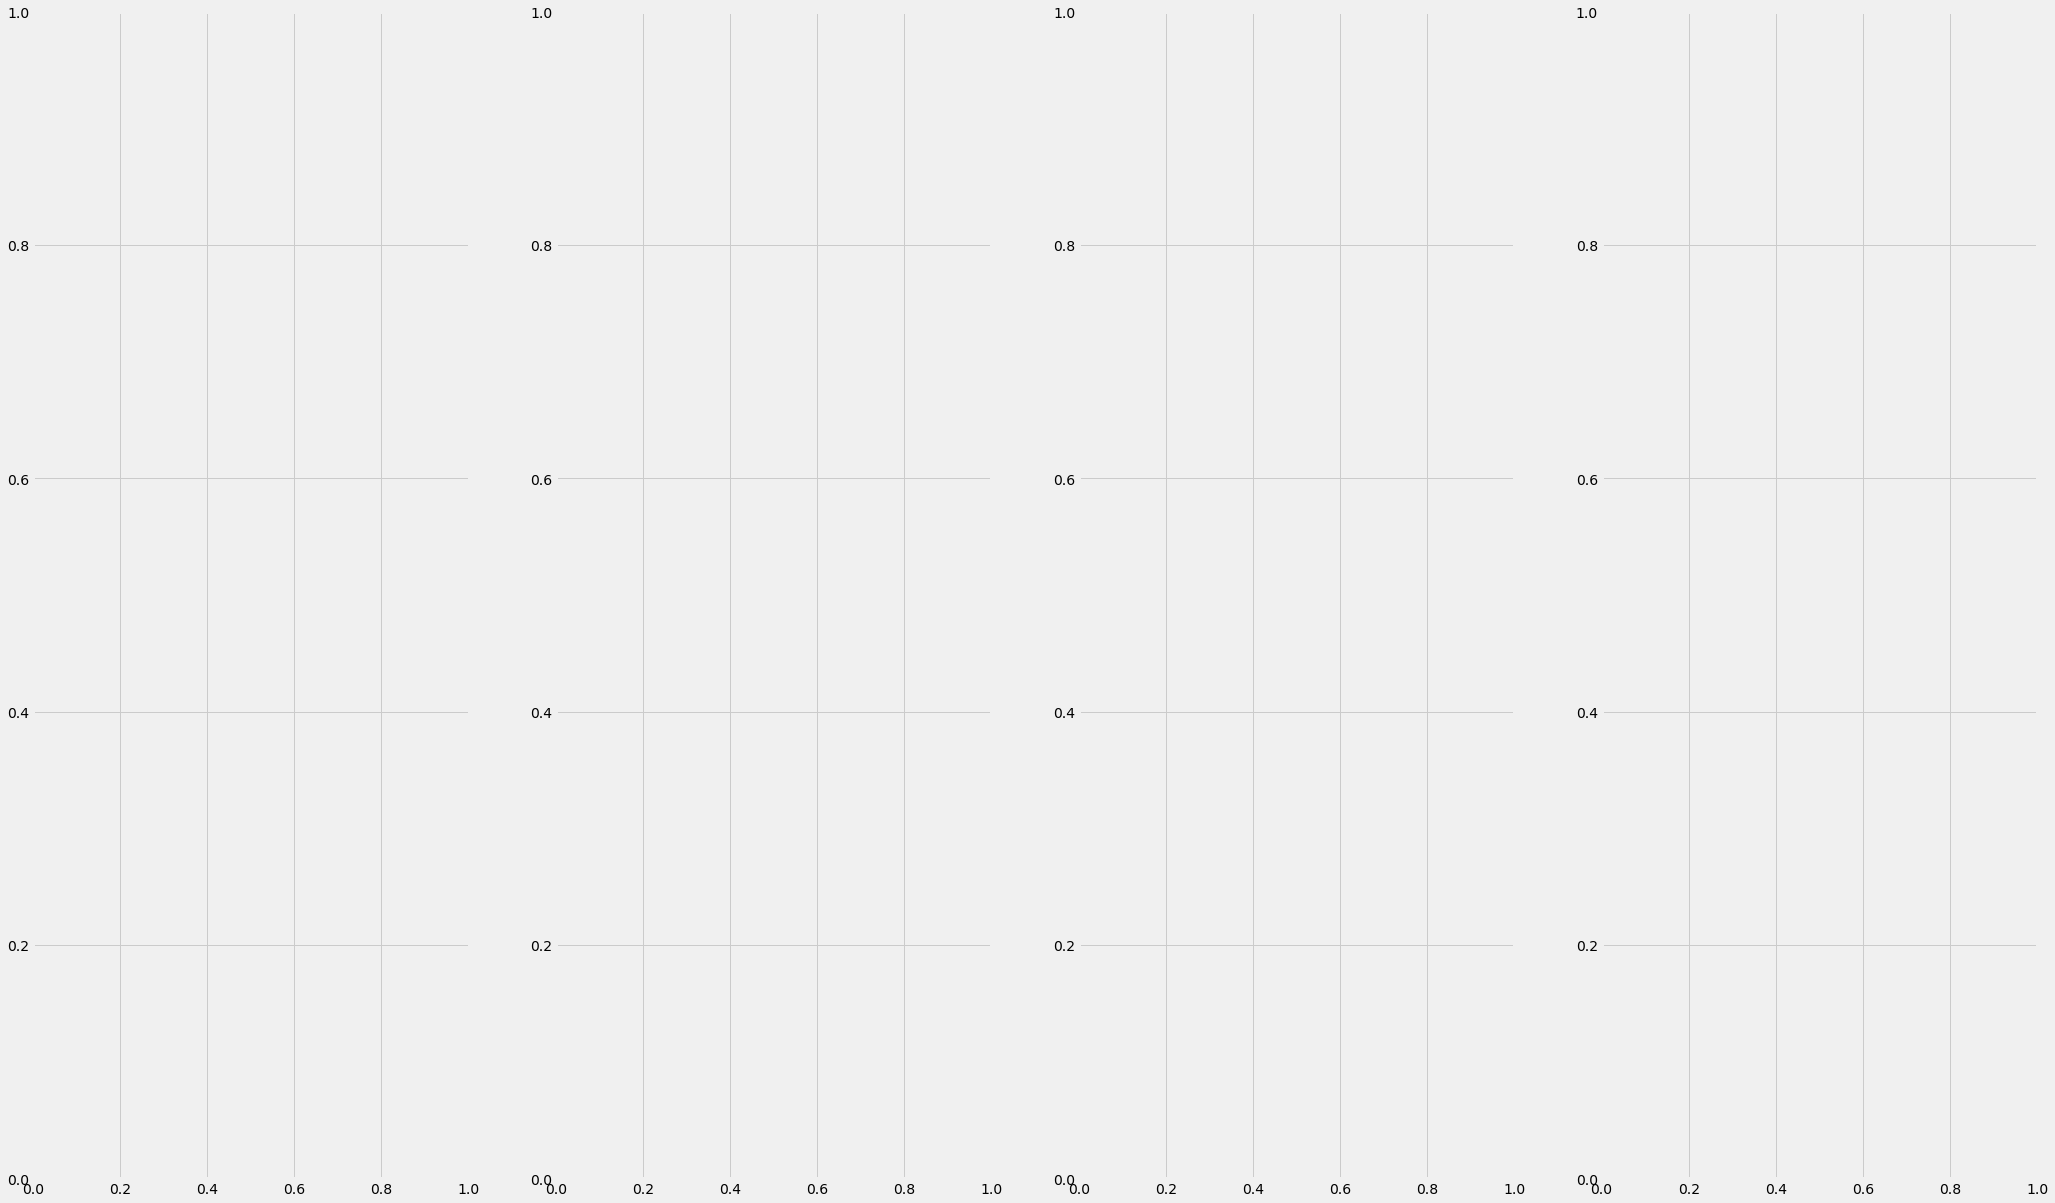

In [ ]:
visualize_silhouette([2, 3, 4, 5], df_for_kmean)

ValueError: ignored

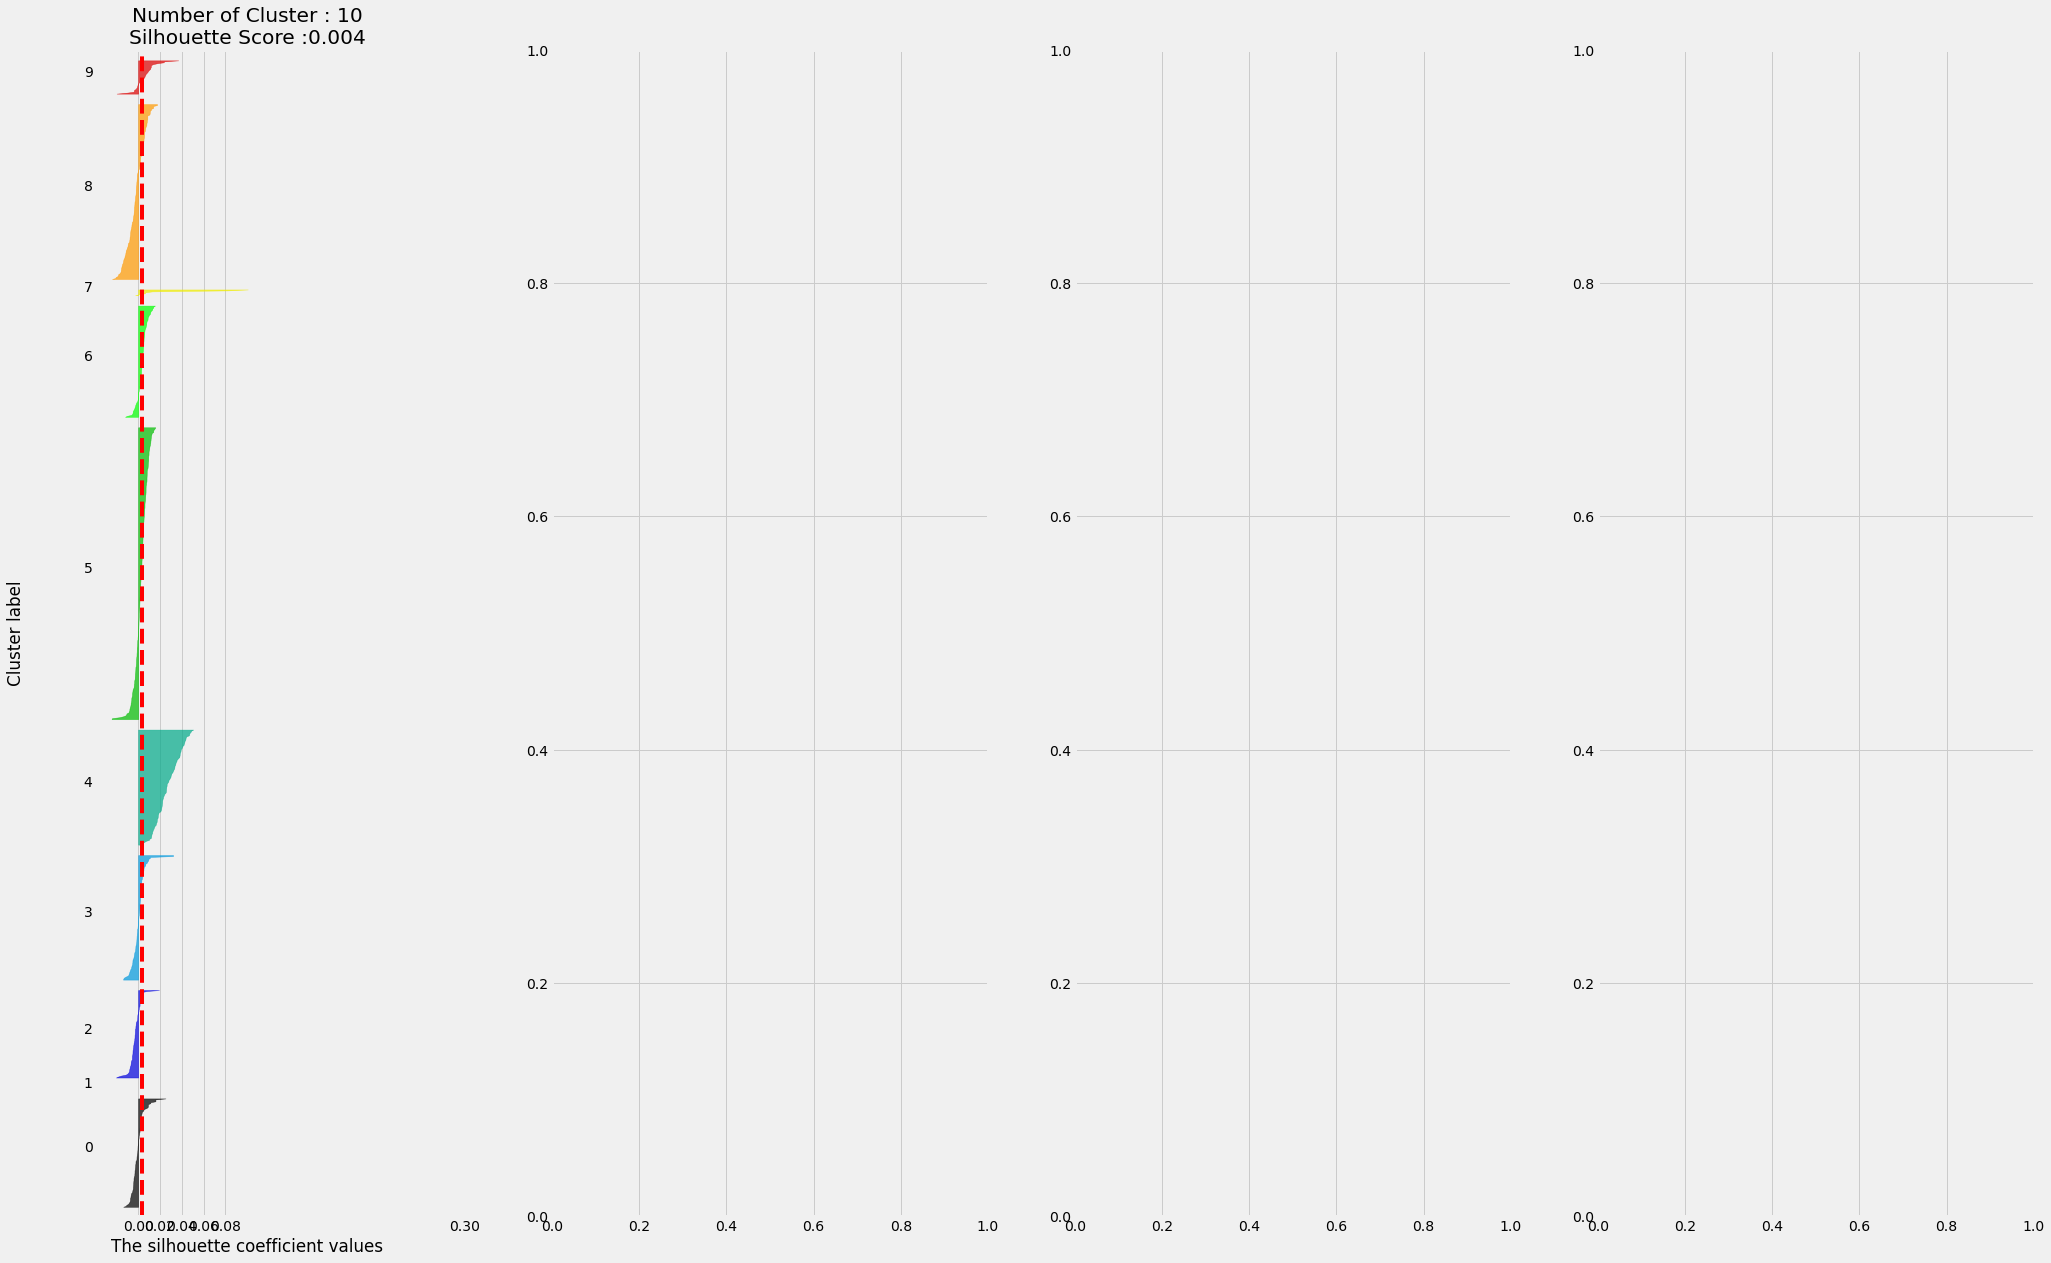

In [ ]:
visualize_silhouette([10, 20, 30, 40], df_for_kmean)

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette2(cluster_lists, df_for_kmean): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for n_cluster in cluster_lists:
        plt.figure(figsize=(50, 20))
        # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=500, random_state=0, init='similar_cut')
        csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
        cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)

        sil_avg = silhouette_score(csr_for_kmean, cluster_labels)
        sil_values = silhouette_samples(csr_for_kmean, cluster_labels)

        y_lower = 10
        plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        plt.xlabel("The silhouette coefficient values")
        plt.ylabel("Cluster label")
        plt.xlim([-0.1, 1.0])
        plt.ylim([0, len(df_for_kmean) + (n_cluster + 1) * 10])
        plt.yticks([])  # Clear the yaxis labels / ticks
        plt.xticks([0, 0.02, 0.04, 0.06, 0.08, 1.0])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        plt.axvline(x=sil_avg, color="red", linestyle="--")

ValueError: ignored

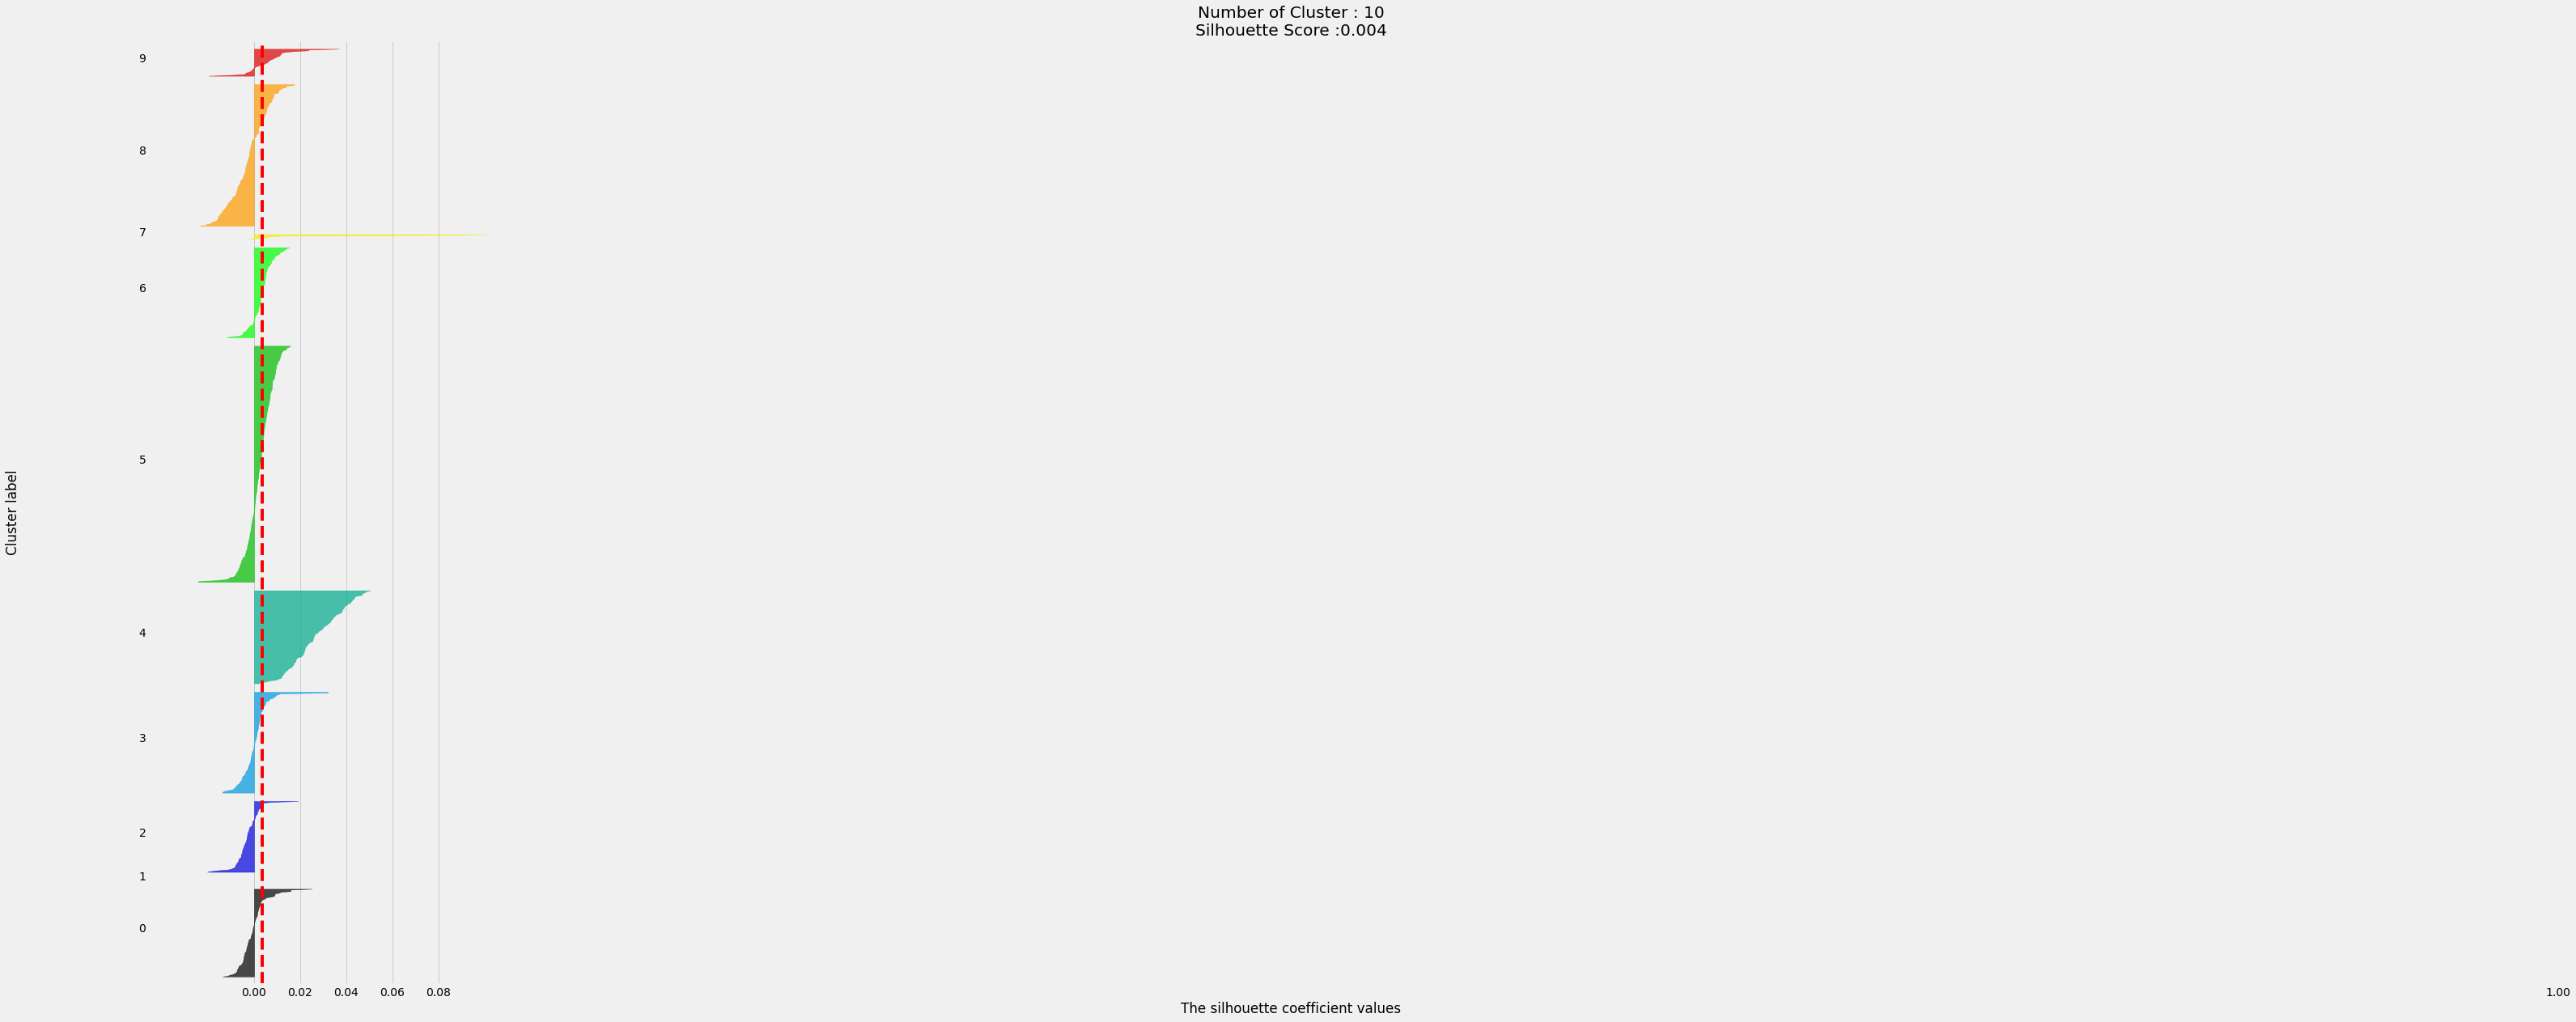

<Figure size 3600x1440 with 0 Axes>

In [ ]:
visualize_silhouette2([10, 20, 30, 40], df_for_kmean)

# Layer 3

In [ ]:
path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer3_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L3_0,L3_1,L3_2,L3_3,L3_4,L3_5,L3_6,L3_7,L3_8,L3_9,...,L3_253,L3_254,L3_255,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.143560,0.125398,0.153696,0.086413,0.111541,0.152632,0.086530,0.133514,0.141122,0.153938,...,0.119488,0.171178,0.080127,1,0,0,0,0,0,0
gyeongbuk_194,0.150055,0.132560,0.161011,0.093052,0.088966,0.151671,0.090369,0.137598,0.158817,0.155494,...,0.118924,0.179331,0.090056,1,0,0,0,0,0,0
gyeongnam_217,0.157220,0.132151,0.153932,0.071520,0.098532,0.157952,0.080284,0.125578,0.139754,0.152090,...,0.119341,0.173510,0.083480,0,0,0,0,0,1,0
jeju_102,0.144177,0.114252,0.162136,0.084627,0.094893,0.156761,0.090104,0.124675,0.145096,0.157779,...,0.081925,0.173054,0.071451,0,0,0,1,0,0,0
jeju_116,0.141616,0.127117,0.159283,0.082114,0.101515,0.156281,0.089998,0.123392,0.148995,0.169307,...,0.113151,0.162212,0.064901,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.150499,0.109789,0.167951,0.070756,0.109301,0.168396,0.092595,0.141758,0.147551,0.151925,...,0.098759,0.170728,0.068459,0,0,0,0,0,1,0
gyeongnam_226,0.160618,0.126066,0.155845,0.105086,0.096096,0.151626,0.102580,0.133452,0.147124,0.155985,...,0.099916,0.170710,0.071005,0,0,0,0,0,1,0
jeju_133,0.147250,0.107108,0.153400,0.077196,0.091995,0.137684,0.109314,0.118358,0.140008,0.161691,...,0.127905,0.180658,0.084182,0,0,0,0,0,1,0


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.14356011, 0.12539776, 0.15369584, ..., 0.        , 0.        ,
        0.        ],
       [0.15005492, 0.13255961, 0.16101107, ..., 0.        , 0.        ,
        0.        ],
       [0.15721977, 0.1321509 , 0.15393177, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.14725044, 0.10710751, 0.15340023, ..., 0.        , 1.        ,
        0.        ],
       [0.14664415, 0.11316856, 0.16485967, ..., 0.        , 1.        ,
        0.        ],
       [0.15258384, 0.12161178, 0.1702005 , ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [15, 20,25]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300, minimum_df_factor=0.05, random_state=0, sparsity='minimum_df', init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 15
0.7880212074600572
-------------------------------------------------------------
n_cluster : 20
0.9166689687865144
-------------------------------------------------------------
n_cluster : 25
0.9132559359726181
-------------------------------------------------------------


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 25
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['gyeongbuk_293']
1
-----------------------------------------------------------------------------
1번째 cluster
['gyeongbuk_284']
1
-----------------------------------------------------------------------------
2번째 cluster
['gangwon_228']
1
-----------------------------------------------------------------------------
3번째 cluster
['jeju_102', 'gyeongnam_175', 'jeonnam_99', 'jeonnam_66', 'gyeongbuk_208', 'jeju_275', 'jeonnam_249', 'jeonnam_261', 'gyeongbuk_197', 'gangwon_238', 'gangwon_172', 'jeonnam_64', 'jeonnam_129', 'gangwon_31', 'gyeongnam_163', 'jeonnam_262', 'jeonnam_276', 'gangwon_211', 'gyeongnam_239', 'gangwon_229', 'gangwon_188', 'gyeongbuk_227', 'jeonnam_138', 'jeonnam_139', 'jeonnam_48', 'jeju_58', 'gangwon_176', 'gyeongnam_199', 'gangwon_34', 'gangwon_189', 'gangwon_216', 'jeju_271', 'jeju_265', 'gyeongnam_170', 'gangwon_174', 'jeonnam_270', 'jeonnam_258', 'gyeongnam_260', 'gangwon_270', 'gangwon_264', 'gyeongbuk_242', 'gangwon_86', 'gangwon_51', 'gangwon_79', 'gan

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    print('-------------------------------------------------------------------------------------')
    print('-------------------------------' + str(n_cluster) + '-------------------------------')
    print('-------------------------------------------------------------------------------------')
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')


Output hidden; open in https://colab.research.google.com to view.

# Layer 2

In [ ]:
path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer2_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L2_0,L2_1,L2_2,L2_3,L2_4,L2_5,L2_6,L2_7,L2_8,L2_9,...,L2_125,L2_126,L2_127,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.139648,0.169798,0.136722,0.108873,0.176598,0.123397,0.120343,0.245084,0.149954,0.288930,...,0.113126,0.305492,0.151653,1,0,0,0,0,0,0
gyeongbuk_194,0.140625,0.193402,0.150842,0.108315,0.186995,0.132722,0.113584,0.244671,0.152429,0.307828,...,0.118192,0.322847,0.149029,1,0,0,0,0,0,0
gyeongnam_217,0.141954,0.178325,0.142441,0.102194,0.190987,0.121189,0.114551,0.233060,0.150725,0.302136,...,0.106955,0.321539,0.152065,0,0,0,0,0,1,0
jeju_102,0.151979,0.173062,0.145052,0.106857,0.177310,0.133428,0.102689,0.248616,0.144603,0.297525,...,0.106826,0.306511,0.142500,0,0,0,1,0,0,0
jeju_116,0.132614,0.175584,0.139151,0.111856,0.175659,0.150412,0.101449,0.255162,0.157335,0.303659,...,0.096464,0.333100,0.142683,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.135774,0.180139,0.146762,0.105828,0.186918,0.125276,0.125666,0.242583,0.143527,0.314263,...,0.118857,0.323966,0.153585,0,0,0,0,0,1,0
gyeongnam_226,0.130606,0.186938,0.146593,0.120030,0.192117,0.121673,0.114408,0.237203,0.151742,0.305917,...,0.105625,0.323678,0.161128,0,0,0,0,0,1,0
jeju_133,0.138077,0.169712,0.142581,0.103773,0.180805,0.136002,0.108735,0.218698,0.163893,0.294224,...,0.101078,0.305961,0.161473,0,0,0,0,0,1,0


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.13964792, 0.16979845, 0.13672163, ..., 0.        , 0.        ,
        0.        ],
       [0.14062482, 0.19340177, 0.15084216, ..., 0.        , 0.        ,
        0.        ],
       [0.14195447, 0.17832497, 0.1424412 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13807708, 0.16971177, 0.14258073, ..., 0.        , 1.        ,
        0.        ],
       [0.14261663, 0.17112336, 0.14061609, ..., 0.        , 1.        ,
        0.        ],
       [0.13017978, 0.1869891 , 0.15553892, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [3, 5]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300,  random_state=0, init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 3
0.7529609224597732
-------------------------------------------------------------
n_cluster : 5
0.3946281401941283
-------------------------------------------------------------


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 3
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['gyeongnam_217', 'gyeongbuk_143', 'gyeongbuk_24', 'gyeongnam_9', 'gyeongbuk_0', 'gyeongbuk_18', 'gyeongnam_161', 'jeju_274', 'gangwon_33', 'gangwon_165', 'gangwon_171', 'gyeongbuk_221', 'gyeongbuk_209', 'gangwon_5', 'jeju_77', 'jeonnam_116', 'jeonnam_102', 'jeju_89', 'jeonnam_103', 'gangwon_4', 'jeonnam_72', 'jeju_6', 'gyeongbuk_220', 'gyeongbuk_234', 'gangwon_164', 'gyeongnam_148', 'gyeongnam_160', 'jeju_249', 'gyeongnam_174', 'gyeongbuk_19', 'gyeongnam_8', 'gyeongbuk_1', 'gangwon_206', 'gyeongbuk_142', 'gyeongbuk_195', 'gyeongnam_216', 'gyeongbuk_181', 'jeju_129', 'jeonnam_277', 'gyeongbuk_33', 'gangwon_18', 'gyeongnam_162', 'jeju_263', 'gangwon_24', 'gyeongnam_19', 'gangwon_6', 'jeonnam_58', 'jeju_48', 'jeonnam_101', 'jeonnam_100', 'jeonnam_59', 'gangwon_7', 'gyeongnam_18', 'gyeongbuk_237', 'gyeongnam_30', 'gyeongnam_24', 'jeju_262', 'gangwon_25', 'gyeongbuk_26', 'jeonnam_289', 'gangwon_205', 'gyeongnam_229', 'gyeongbuk_182', 'gyeongnam_201', 'gyeongnam_215', 'jeju_128'

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    print('-------------------------------------------------------------------------------------')
    print('------------------------------- n_cluster : ' + str(n_cluster) + '-------------------------------')
    print('-------------------------------------------------------------------------------------')
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')


Output hidden; open in https://colab.research.google.com to view.

# Layer 2+3

In [ ]:

path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer2+3_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L2_0,L2_1,L2_2,L2_3,L2_4,L2_5,L2_6,L2_7,L2_8,L2_9,...,L3_253,L3_254,L3_255,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.139648,0.169798,0.136722,0.108873,0.176598,0.123397,0.120343,0.245084,0.149954,0.288930,...,0.119488,0.171178,0.080127,1,0,0,0,0,0,0
gyeongbuk_194,0.140625,0.193402,0.150842,0.108315,0.186995,0.132722,0.113584,0.244671,0.152429,0.307828,...,0.118924,0.179331,0.090056,1,0,0,0,0,0,0
gyeongnam_217,0.141954,0.178325,0.142441,0.102194,0.190987,0.121189,0.114551,0.233060,0.150725,0.302136,...,0.119341,0.173510,0.083480,0,0,0,0,0,1,0
jeju_102,0.151979,0.173062,0.145052,0.106857,0.177310,0.133428,0.102689,0.248616,0.144603,0.297525,...,0.081925,0.173054,0.071451,0,0,0,1,0,0,0
jeju_116,0.132614,0.175584,0.139151,0.111856,0.175659,0.150412,0.101449,0.255162,0.157335,0.303659,...,0.113151,0.162212,0.064901,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.135774,0.180139,0.146762,0.105828,0.186918,0.125276,0.125666,0.242583,0.143527,0.314263,...,0.098759,0.170728,0.068459,0,0,0,0,0,1,0
gyeongnam_226,0.130606,0.186938,0.146593,0.120030,0.192117,0.121673,0.114408,0.237203,0.151742,0.305917,...,0.099916,0.170710,0.071005,0,0,0,0,0,1,0
jeju_133,0.138077,0.169712,0.142581,0.103773,0.180805,0.136002,0.108735,0.218698,0.163893,0.294224,...,0.127905,0.180658,0.084182,0,0,0,0,0,1,0


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.13964792, 0.16979845, 0.13672163, ..., 0.        , 0.        ,
        0.        ],
       [0.14062482, 0.19340177, 0.15084216, ..., 0.        , 0.        ,
        0.        ],
       [0.14195447, 0.17832497, 0.1424412 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13807708, 0.16971177, 0.14258073, ..., 0.        , 1.        ,
        0.        ],
       [0.14261663, 0.17112336, 0.14061609, ..., 0.        , 1.        ,
        0.        ],
       [0.13017978, 0.1869891 , 0.15553892, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [15, 20, 25, 30]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300,  random_state=0, init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 15
0.42710250808000066
-------------------------------------------------------------
n_cluster : 20
0.38332027540798175
-------------------------------------------------------------
n_cluster : 25
0.1175661904410796
-------------------------------------------------------------
n_cluster : 30
0.06894481811238226
-------------------------------------------------------------


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 20
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['gyeongbuk_284', 'jeonnam_236']
2
-----------------------------------------------------------------------------
1번째 cluster
['gangwon_159', 'jeju_101', 'gangwon_210', 'jeju_61', 'jeju_75', 'gangwon_19', 'jeju_114', 'gangwon_215', 'gyeongnam_167', 'jeonnam_110', 'gyeongnam_158', 'gyeongbuk_90', 'jeonnam_149', 'gyeongbuk_243', 'jeju_200', 'gyeongnam_299', 'jeju_205', 'jeju_211', 'gyeongbuk_250', 'jeonnam_198', 'jeonnam_172', 'gangwon_115', 'gangwon_57', 'gangwon_41', 'gyeongnam_255', 'jeju_154', 'gangwon_59', 'jeonnam_197', 'gyeongbuk_128', 'jeju_182', 'jeju_155', 'gyeongnam_254', 'gangwon_66', 'gangwon_130', 'jeju_37', 'jeju_181', 'gyeongbuk_117', 'jeju_146', 'jeonnam_23', 'gyeongbuk_61', 'gangwon_256', 'gyeongnam_250', 'gangwon_268', 'gyeongbuk_272', 'gyeongnam_61', 'jeju_30', 'gangwon_282', 'jeju_296', 'jeju_56', 'jeju_43', 'gangwon_190', 'gangwon_184', 'gyeongnam_194', 'jeju_96', 'jeju_40', 'jeju_54', 'gyeongnam_11', 'gyeongnam_181', 'gangwon_224', 'jeju_93', 'jeju_130',

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    print('-------------------------------------------------------------------------------------')
    print('------------------------------- n_cluster : ' + str(n_cluster) + '-------------------------------')
    print('-------------------------------------------------------------------------------------')
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')


Output hidden; open in https://colab.research.google.com to view.

# Layer 2+4

In [ ]:
path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer2+4_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L2_0,L2_1,L2_2,L2_3,L2_4,L2_5,L2_6,L2_7,L2_8,L2_9,...,L4_509,L4_510,L4_511,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.139648,0.169798,0.136722,0.108873,0.176598,0.123397,0.120343,0.245084,0.149954,0.288930,...,0.905530,1.049204,0.956306,1,0,0,0,0,0,0
gyeongbuk_194,0.140625,0.193402,0.150842,0.108315,0.186995,0.132722,0.113584,0.244671,0.152429,0.307828,...,0.869837,1.010402,0.949081,1,0,0,0,0,0,0
gyeongnam_217,0.141954,0.178325,0.142441,0.102194,0.190987,0.121189,0.114551,0.233060,0.150725,0.302136,...,0.886043,1.154529,0.931309,0,0,0,0,0,1,0
jeju_102,0.151979,0.173062,0.145052,0.106857,0.177310,0.133428,0.102689,0.248616,0.144603,0.297525,...,0.970793,0.991031,0.978287,0,0,0,1,0,0,0
jeju_116,0.132614,0.175584,0.139151,0.111856,0.175659,0.150412,0.101449,0.255162,0.157335,0.303659,...,0.988840,1.087273,0.901601,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.135774,0.180139,0.146762,0.105828,0.186918,0.125276,0.125666,0.242583,0.143527,0.314263,...,0.987846,1.090713,0.983477,0,0,0,0,0,1,0
gyeongnam_226,0.130606,0.186938,0.146593,0.120030,0.192117,0.121673,0.114408,0.237203,0.151742,0.305917,...,0.943487,1.095905,0.946472,0,0,0,0,0,1,0
jeju_133,0.138077,0.169712,0.142581,0.103773,0.180805,0.136002,0.108735,0.218698,0.163893,0.294224,...,0.932357,1.063367,0.945248,0,0,0,0,0,1,0


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.13964792, 0.16979845, 0.13672163, ..., 0.        , 0.        ,
        0.        ],
       [0.14062482, 0.19340177, 0.15084216, ..., 0.        , 0.        ,
        0.        ],
       [0.14195447, 0.17832497, 0.1424412 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13807708, 0.16971177, 0.14258073, ..., 0.        , 1.        ,
        0.        ],
       [0.14261663, 0.17112336, 0.14061609, ..., 0.        , 1.        ,
        0.        ],
       [0.13017978, 0.1869891 , 0.15553892, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [15, 20]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300,  random_state=0, init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 15
-0.0016442756686912048
-------------------------------------------------------------
n_cluster : 20
0.11969511894291733
-------------------------------------------------------------


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 20
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['jeju_274', 'jeju_89', 'gyeongnam_8', 'gangwon_7', 'gyeongnam_30', 'gangwon_25', 'gyeongnam_215', 'jeju_128', 'gyeongnam_198', 'jeonnam_61', 'gangwon_3', 'gangwon_0', 'gangwon_106', 'gyeongbuk_109', 'jeonnam_13', 'jeju_215', 'gyeongbuk_292', 'gyeongnam_81', 'gyeongbuk_291', 'gyeongnam_241', 'gangwon_251', 'gangwon_133', 'gyeongnam_59', 'gyeongnam_297', 'gyeongnam_98', 'gyeongbuk_48', 'jeonnam_184', 'gyeongbuk_49', 'gangwon_137', 'gyeongnam_292', 'gyeongnam_222', 'gyeongnam_38', 'gangwon_234', 'jeju_253', 'gyeongnam_5', 'jeonnam_250', 'jeju_279']
37
-----------------------------------------------------------------------------
1번째 cluster
['gangwon_159', 'jeju_101', 'gangwon_210', 'jeju_61', 'jeju_75', 'gangwon_19', 'jeju_114', 'gangwon_215', 'gyeongnam_167', 'jeonnam_110', 'gyeongnam_158', 'gyeongbuk_90', 'jeonnam_149', 'gyeongbuk_243', 'jeju_200', 'gyeongnam_299', 'jeju_205', 'jeju_211', 'gyeongbuk_250', 'jeonnam_198', 'jeonnam_172', 'gangwon_115', 'gangwon_57', 'gangwon_4

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    print('-------------------------------------------------------------------------------------')
    print('------------------------------- n_cluster : ' + str(n_cluster) + '-------------------------------')
    print('-------------------------------------------------------------------------------------')
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')


Output hidden; open in https://colab.research.google.com to view.

# Layer 2+3+4

In [ ]:
path = '/content/drive/MyDrive/추천시스템_컨퍼런스/레이어추출 조합/1117img_layer2+3+4_feature.csv'
df_image_embedding = pd.read_csv(path, index_col=0)
df_image_embedding.insert(0, 'image_index', df_image_embedding['img_name'].apply(lambda x: os.path.splitext(x)[0]))
df_merged = pd.merge(df_image_embedding, df_data_preprocessed, how='inner', on='image_index')
df_merged = df_merged.drop(["숙소이름", "한줄소개", "리뷰평점 및 개수", "숙소 링크", "keyword", "rating", "comment", "keyword2"], axis=1)
df_for_similarity = df_merged.drop(["img_name", "image_url"], axis=1)
df_for_similarity = df_for_similarity.set_index('image_index')
df_for_similarity

,L2_0,L2_1,L2_2,L2_3,L2_4,L2_5,L2_6,L2_7,L2_8,L2_9,...,L4_509,L4_510,L4_511,single,multi,outhouse,apartment,camping,pension,hotel
image_index,,,,,,,,,,,,,,,,,,,,,
gyeongnam_203,0.139648,0.169798,0.136722,0.108873,0.176598,0.123397,0.120343,0.245084,0.149954,0.288930,...,0.905530,1.049204,0.956306,1,0,0,0,0,0,0
gyeongbuk_194,0.140625,0.193402,0.150842,0.108315,0.186995,0.132722,0.113584,0.244671,0.152429,0.307828,...,0.869837,1.010402,0.949081,1,0,0,0,0,0,0
gyeongnam_217,0.141954,0.178325,0.142441,0.102194,0.190987,0.121189,0.114551,0.233060,0.150725,0.302136,...,0.886043,1.154529,0.931309,0,0,0,0,0,1,0
jeju_102,0.151979,0.173062,0.145052,0.106857,0.177310,0.133428,0.102689,0.248616,0.144603,0.297525,...,0.970793,0.991031,0.978287,0,0,0,1,0,0,0
jeju_116,0.132614,0.175584,0.139151,0.111856,0.175659,0.150412,0.101449,0.255162,0.157335,0.303659,...,0.988840,1.087273,0.901601,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gyeongnam_232,0.135774,0.180139,0.146762,0.105828,0.186918,0.125276,0.125666,0.242583,0.143527,0.314263,...,0.987846,1.090713,0.983477,0,0,0,0,0,1,0
gyeongnam_226,0.130606,0.186938,0.146593,0.120030,0.192117,0.121673,0.114408,0.237203,0.151742,0.305917,...,0.943487,1.095905,0.946472,0,0,0,0,0,1,0
jeju_133,0.138077,0.169712,0.142581,0.103773,0.180805,0.136002,0.108735,0.218698,0.163893,0.294224,...,0.932357,1.063367,0.945248,0,0,0,0,0,1,0


In [ ]:
df_for_kmean= df_for_similarity.to_numpy()
df_for_kmean

array([[0.13964792, 0.16979845, 0.13672163, ..., 0.        , 0.        ,
        0.        ],
       [0.14062482, 0.19340177, 0.15084216, ..., 0.        , 0.        ,
        0.        ],
       [0.14195447, 0.17832497, 0.1424412 , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.13807708, 0.16971177, 0.14258073, ..., 0.        , 1.        ,
        0.        ],
       [0.14261663, 0.17112336, 0.14061609, ..., 0.        , 1.        ,
        0.        ],
       [0.13017978, 0.1869891 , 0.15553892, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from soyclustering import SphericalKMeans
from scipy import sparse

sil_avg_lst = []
sil_values_lst = []
n_cluster_lst = [15]
df_spheric_kmenas_result = df_for_similarity.copy()

for n_cluster in n_cluster_lst:

    print('n_cluster : ' + str(n_cluster))
    # SphericalKMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
    spherical_kmeans = SphericalKMeans(n_clusters = n_cluster, max_iter=300,  random_state=0, init='similar_cut')
    csr_for_kmean = sparse.csr_matrix(df_for_kmean) # csr matrix로 변환
    cluster_labels = spherical_kmeans.fit_predict(csr_for_kmean)
    df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] = cluster_labels

    sil_avg = silhouette_score(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_avg_lst.append(sil_avg)
    print(sil_avg)
    sil_values = silhouette_samples(csr_for_kmean, cluster_labels, metric = 'cosine')
    sil_values_lst.append(sil_values)
    df_spheric_kmenas_result['sil_coef_' + str(n_cluster)] = sil_values
    print('-------------------------------------------------------------')

    #average_score = silhouette_score(csr_for_kmean, df_spheric_kmenas_result['cluster_spheric'], metric='cosine')
    
    #print(df_spheric_kmenas_result.groupby('cluster_spheric')['silhoutte_coeff'].mean())

n_cluster : 15
0.0018029782439555103
-------------------------------------------------------------


In [ ]:
# 각 군집별 개수 구하기
n_cluster = 15
for i in range(n_cluster):
    cluster_list = list(df_spheric_kmenas_result[df_spheric_kmenas_result['cluster_spheric_' + str(n_cluster)] == i].index)
    print(str(i) + '번째 cluster')
    print(cluster_list)
    print(len(cluster_list))
    print('-----------------------------------------------------------------------------')

0번째 cluster
['gyeongnam_9', 'gyeongnam_161', 'jeju_274', 'gangwon_33', 'gyeongbuk_209', 'jeonnam_116', 'jeonnam_102', 'gangwon_4', 'gyeongbuk_234', 'gangwon_164', 'gyeongnam_8', 'gyeongnam_216', 'gyeongbuk_181', 'jeju_129', 'gangwon_18', 'gyeongnam_162', 'jeonnam_58', 'jeonnam_101', 'jeonnam_100', 'jeonnam_59', 'gangwon_7', 'gyeongnam_30', 'jeju_262', 'gyeongbuk_26', 'gangwon_205', 'gyeongnam_215', 'jeju_128', 'gyeongbuk_151', 'gyeongnam_198', 'jeju_1', 'gangwon_177', 'jeonnam_105', 'gyeongnam_166', 'gyeongnam_212', 'gyeongbuk_35', 'jeju_72', 'gangwon_1', 'gangwon_175', 'gyeongnam_213', 'gyeongbuk_184', 'jeju_112', 'jeju_106', 'jeju_161', 'gyeongnam_248', 'jeju_175', 'gyeongbuk_295', 'gyeongbuk_281', 'gyeongnam_86', 'jeju_217', 'gangwon_44', 'jeju_14', 'jeju_28', 'jeju_15', 'gyeongnam_44', 'gyeongbuk_109', 'gyeongnam_249', 'gangwon_139', 'jeju_17', 'jeonnam_13', 'jeju_201', 'gyeongbuk_45', 'gangwon_266', 'gyeongnam_262', 'gangwon_262', 'jeonnam_239', 'jeonnam_205', 'gyeongnam_94', 'jeo

In [ ]:
# 군집 결과 시각화
for n_cluster in n_cluster_lst:
    print('-------------------------------------------------------------------------------------')
    print('------------------------------- n_cluster : ' + str(n_cluster) + '-------------------------------')
    print('-------------------------------------------------------------------------------------')
    for i in range(n_cluster):
        get_spherical_cluster_image(n_cluster, i)
        print('-------------------------------------------------------------------------------------')


Output hidden; open in https://colab.research.google.com to view.